### Analyzing the Stroop Effect

### Background Information
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

**(1) What is the independent variable? What is the dependent variable?**

**independent variable:** congruent/incongruent condition.

**dependent variable:** Time to finish test / seconds spent in viewing.

**(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.**

Null Hypothsis: H0 = No change in time when comparing congruent task vs incongruent task

Alternate Hypothesis: H1 = incongruent task will take more time finish vs the congruent task.

| μi: population mean of incongruent values | μc: population mean of congruent values |

H0: μi ≤ μc 

H1: μi > μc 

Statistical test: Dependent t-test (two tailed)
- Compare the means of two related groups to determine the statistically significant difference between two means.

Assumptions:
1. Normal Distributions
2. Popualation Standard Deviation Unknown
3. Sample size less than 30

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [14]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from scipy.stats import t
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv('stroopdata.csv')
print("Mean for congruent values {0:.5f}".format(np.mean(df['Congruent'].values)))
print("Mean for incongruent values {0:.5f}".format(np.mean(df['Incongruent'].values)))

print("Standard deviation for congruent {0:.5f}".format(df.Congruent.std()))
print("Standard deviation for Incongruent {0:.5f}".format(df.Incongruent.std()))

Mean for congruent values 14.05112
Mean for incongruent values 22.01592
Standard deviation for congruent 3.55936
Standard deviation for Incongruent 4.79706


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

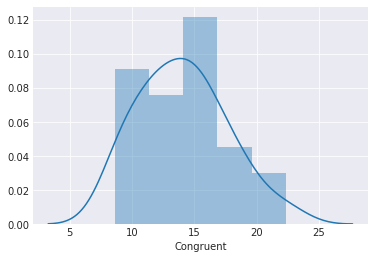

In [16]:
sns.distplot(df['Congruent'])

The data is a bit right skewed but more or less normally distributed with the peak just under 15.

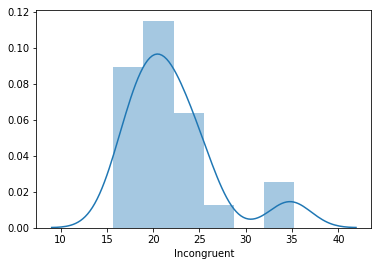

In [39]:
sns.distplot(df['Incongruent'])

The data is skewed to the right and a bit bimodal. With the largest peak at around 20 and the small peak at around 33.


The means of both plots are near the peaks which indicates near normal distribution.

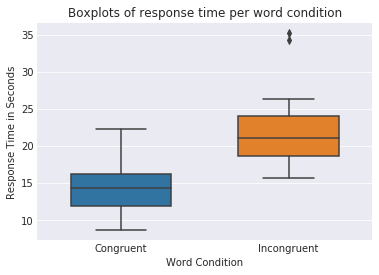

In [32]:
#Create Boxplot
sns.set_style("darkgrid")
sns.boxplot(data=df[['Congruent', 'Incongruent']], orient="v",width=.6);
plt.ylabel("Response Time in Seconds");
plt.xlabel("Word Condition");
plt.title("Boxplots of response time per word condition");

The box plot displays a clear difference between the minimum, median and maximum of two datasets


(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [40]:
#Sample size per task
print("The sample size for congruent is {0:1.0f}".format(df['Congruent'].count()))
print("The sample size for incongruent is {0:1.0f}".format(df['Incongruent'].count()))

The sample size for congruent is 24
The sample size for incongruent is 24


In [41]:
#The t-test critical value for a 95% confidence level and 23 d.f. is below
cv = t.ppf(.95, 23)
print("The t-test critical value for a 95% confidence level and 23 d.f. is {0:.5f}".format(cv))

The t-test critical value for a 95% confidence level and 23 d.f. is 1.71387


In [42]:
#point estimate for the difference of the means is below
pe = np.mean(df['Incongruent'].values) - np.mean(df['Congruent'].values)
print("The point estimate for the difference of the means is {0:.5f}".format(pe))

The point estimate for the difference of the means is 7.96479


The t-test critical value for a 95% confidence level and 23 d.f. is 1.7138715277470473

Our point estimate for the difference of the means is 7.9647916666666667

Our standard deviation of the differences is calculated below.

In [43]:
df['Difference'] = df['Congruent'] - df['Incongruent']
dm = df['Difference'].std(axis=0)
print("standard deviation for the differences {0:.5f}".format(df['Difference'].std(axis=0)))

standard deviation for the differences 4.86483


In [44]:
#t-statistic is calculated below.
ts = pe/(dm / math.sqrt(24))
print("The t-statistic is {0:.5f}".format(ts))

The t-statistic is 8.02071


t-statistic (8.02) > critical value (1.7139)

**Reject H0**

**Conclusion:** It takes less time to perform the congruent task vs incongruent task.